In [1]:
url = 'https://en.wikipedia.org/wiki/Machine_learning'

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:800])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Machine learning - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-la


In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
             self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' ' +data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History and relationships to other fields Toggle History and relationships to other fields subsection 1.1 Artificial intelligence 1.2 Data mining 1.3 Generalization 1.4 Statistics 1.5 Statistical Physics 2 Theory 3 Approaches Toggle Approaches subsection 3.1 Supervised learning 3.2 Unsupervised learning 3.3 Semi-supervised learning 3.4 Reinforcement learning 3.5 Dimensionality reduction 3.6 Other types 3.6.1 Self-learning 3.6.2 Feature learning 3.6.3 Sparse dictionary learning 3.6.4 Anomaly detection 3.

In [4]:
import sys
!{sys.executable} -m pip install nlp_rake

In [18]:
#nlp_rake (pypi.org/project/nlp-rake) is an rapid automatic keyword extraction tool for Python
import nlp_rake
extractor = nlp_rake.Rake(max_words=2, min_freq=5,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('main article', 4.0),
 ('mit press', 4.0),
 ('wayback machine', 3.98),
 ('artificial neuron', 3.966666666666667),
 ('retrieved 2018-08-20', 3.9565217391304346),
 ('statistical learning', 3.9523809523809526),
 ('feature learning', 3.9523809523809526),
 ('reinforcement learning', 3.9523809523809526),
 ('machine learning', 3.932380952380952),
 ('neural networks', 3.9),
 ('artificial intelligence', 3.875757575757576),
 ('supervised learning', 3.8614718614718617),
 ('pattern recognition', 3.833333333333333),
 ('artificial neurons', 3.7848484848484847),
 ('unsupervised learning', 3.7705627705627704),
 ('retrieved 2022-01-17', 3.7342995169082123),
 ('training data', 3.6969696969696972),
 ('computer vision', 3.6904761904761907),
 ('knowledge discovery', 3.5128205128205128),
 ('learning', 1.9523809523809523),
 ('training', 1.696969696969697),
 ('methods', 1.6666666666666667),
 ('algorithms', 1.6538461538461537),
 ('theory', 1.6470588235294117),
 ('examples', 1.625),
 ('

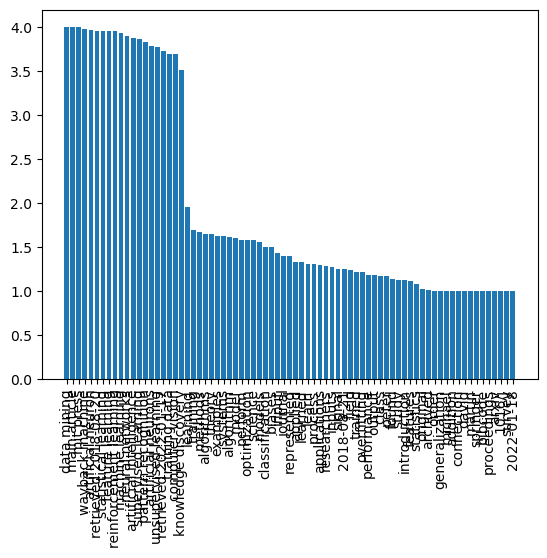

In [19]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation='vertical')
    plt.show()
    
plot(res)

In [20]:
!{sys.executable} -m pip install wordcloud

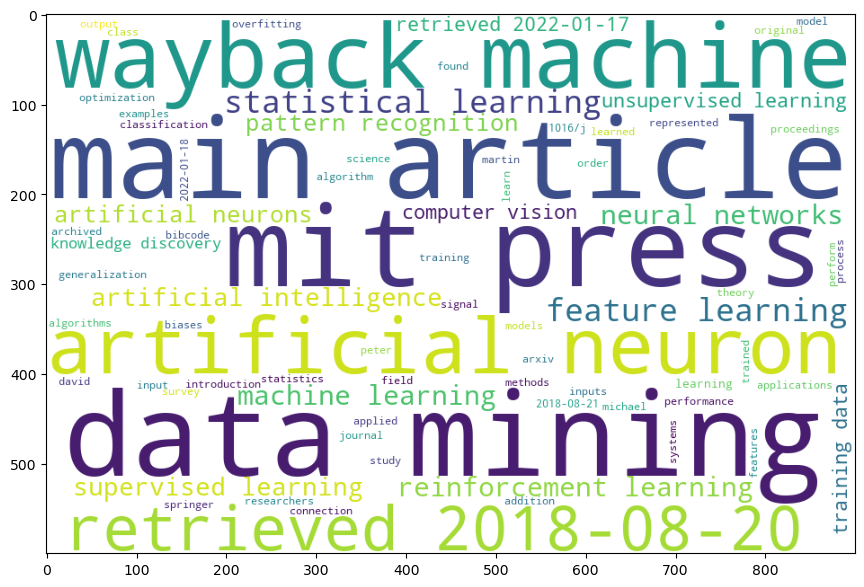

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', width=900, height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res}))

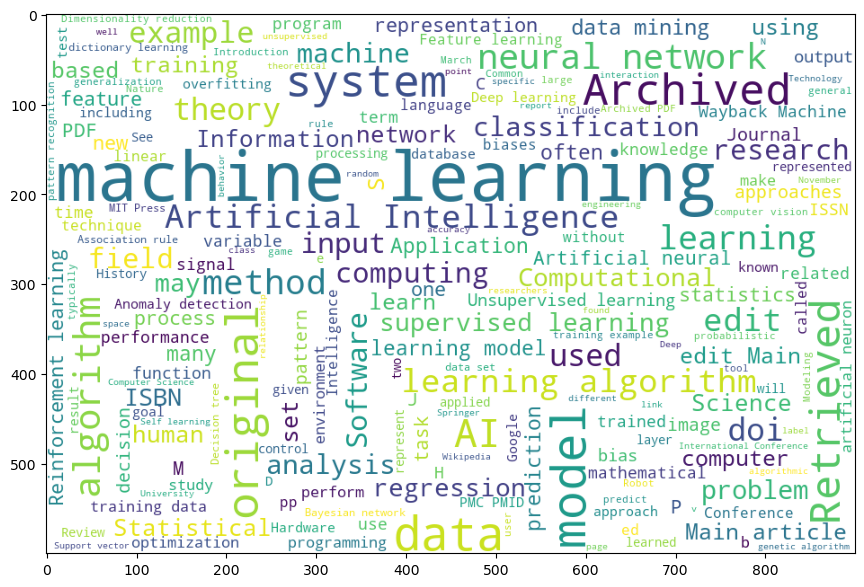

In [22]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))